<font face="sans-serif" color=Red size=6ptx style="line-height:35px;">
<strong>KERAS</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">    
Keras est une librairie de réseaux de neurones écrite en Python et intégrée à TensorFlow. Elle a été développée dans le but de permettre une expérimentation rapide afin de passer de l’idée aux résultats en un minimum de temps.<br>
La librairie Keras répond aux besoins suivants :
<ul>
<li>Prototypage simple et rapide</li>
<li>Prise en charge des réseaux convolutifs (CNN) et des réseaux récurrents (RNN)</li>
<li>Déploiement sur CPU ou sur GPU</li>
</ul>
Nous présentons dans cette page les trois approches fournies par Keras pour construire des réseaux :<br>
<font face="sans-serif" color=Blue size=4ptx style="line-height:35px;">
<strong>La classe Sequential</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Ce container permet de décrire un réseau séquentiel en empilant différentes couches.</font><br>
<font face="sans-serif" color=Blue size=4ptx style="line-height:35px;">
<strong>L’API Functional</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
C'est un compromis entre la facilité et flexibilité, c'est l’approche la plus utilisée.</font><br>
<font face="sans-serif" color=Blue size=4ptx style="line-height:35px;">
<strong>La classe Model</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Elle permet une approche bas-niveau, qui fournit un contrôle total mais qui ne donne plus accès à la plupart des fonctionnalités de Keras.</font><br>
<font face="sans-serif" color=Green size=4ptx style="line-height:35px;">
<strong>Les tenseurs</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
La librairie Keras n’utilise pas en interne de tableaux NumPy mais un objet équivalent appelé tenseur. Les tenseurs peuvent par exemple être stockés sur GPU alors que les tableaux NumPy sont limités aux CPU. On retrouve de nombreuses similarités :
</font>

In [140]:
import tensorflow as tf
T = tf.ones((3,2))
print(f'T.shape --> {T.shape}\n')
print(f'T.dtype --> {T.dtype}\n')
print(T)

T.shape --> (3, 2)

T.dtype --> <dtype: 'float32'>

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


<font face="sans-serif" color=green size=4ptx style="line-height:35px;">
<strong>Conversion vers un tenseur</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
Pour stocker les données d’entrée, nous utilisons la syntaxe suivante :<br>
</font>

In [5]:
import tensorflow as tf
import numpy as np

Tensor1 = tf.constant([[1, 2, 3],[1, 2, 3],[1, 2, 3],[1, 2, 3]])   # conversion liste => tenseur
print(Tensor1)
A  = np.ones((1,2))
print(A)
Tensor2 = tf.constant(A)   
print (Tensor2)# conversion numpy array => tenseur

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]
 [1 2 3]], shape=(4, 3), dtype=int32)
[[1. 1.]]
tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float64)


<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Pour indiquer le type des données en entrée, on peut utiliser le paramètre dtype=tf.float32.</font>

In [32]:
Tensor1 = tf.constant([1, 2, 3],dtype=tf.float32)
print(Tensor1)

tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)


<font face="sans-serif" color=green size=4ptx style="line-height:25px;">  
<strong>Conversion depuis tenseur</strong></font><br>

In [148]:
print(Tensor1.numpy())

[1. 2. 3.]


<font face="sans-serif" color=blue size=5ptx style="line-height:35px;">
<strong>La class Sequential</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
Keras fournit une classe container permettant une écriture simple et aisée pour construire des réseaux de    neurones séquentiels.<br>
</font>
<font face="sans-serif" color=green size=4ptx style="line-height:35px;">
<strong>model.add ( )</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
La classe modélisant le réseau séquentiel est instancié en premier :    
<ul>
  <li>model = keras.Sequential().</li>
</ul>    
On lui ajoute deux couches de type FC, créées en donnant leurs caractéristiques principales. Une couche est dite fully-connected (FC) lorsque tous les neurones de la couche précédente sont reliés à tous les neurones de la couche qui suit.</font>

In [30]:
from tensorflow import keras
import numpy as np

models = keras.Sequential()

models.add( keras.layers.Dense(32, input_shape=(16,), activation='relu') )
models.add( keras.layers.Dense(20) )

<font face="sans-serif" color=black size=3ptx style="line-height:25px;">     
Les différents paramètres pour la fonction d’activation : “relu”, “softmax”, “tanh”, “sigmoid”.<br>   
Le paramètre input_shape est optionnel, s’il est omis, Keras utilisera la taille du tenseur fournit pour la phase d’apprentissage.  <br>  
<strong>Note: la fonction d’activation softmax est un élément important dans la conception d’un réseau de neurones.</strong> <br>
La fonction d’activation a pour rôle de casser la linéarité entre deux couches successives et de remettre les valeurs d’une couche dans un intervalle donné.</font> 
$${\Large \displaystyle \sigma (\mathbf {z} )_{j}={\frac {\mathrm {e} ^{z_{j}}}{\sum _{k=1}^{K}\mathrm {e} ^{z_{k}}}}}$$
<br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
Le second cas d’usage concerne davantage la fonction softmax, car le cadre d’utilisation de cette fonction est celui du problème de classification multi-classe.    
<div><img src="images/softmax-15.png" style="width:600px;"/></div> 
 <strong>La fonction sigmoïde</strong> est une fonction bornée non linéaire qui mappe une entrée à valeur réelle sur une sortie entre 0 et 1. Il s'agit d'une fonction mathématique utilisée dans les réseaux de neurones artificiels pour produire une sortie.<br>
<strong>La fonction softmax </strong>est une fonction non linéaire et illimitée qui mappe une entrée à valeur réelle sur une sortie entre 0 et 1 dont la somme est égale à 1 pour chaque vecteur d'entrée.<br>  
<font face="sans-serif" color=green size=4ptx style="line-height:35px;">
<strong>Softmax est principalement utilisé dans les Réseaux de neurones artificiels et convolutifs</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
Lors de l'utilisation de réseaux de neurones, une certaine forme de normalisation de sortie est généralement appliquée. Cette idée vise à mapper la sortie non normalisée des données à la distribution de probabilité pour les classes de sortie. Il est le plus souvent utilisé dans les couches finales d'un classificateur basé sur un réseau de neurones. Sa formation est généralement effectuée à l'aide de la perte de journal ou de l'entropie croisée.<br>
Il s'agit d'une variante non linéaire de la régression logistique multinomiale (Softmax Regression).<br>
<font face="sans-serif" color=black size=3ptx style="line-height:20px;"> 
Autres méthodes de classification multiclasses, telles que: 
<ul>
  <li>l'analyse discriminante linéaire multiclasse (MLDA)</li>
  <li>les classificateurs Naive Bayes, etc.</li>
</ul>
<font face="sans-serif" color=black size=3ptx style="line-height:20px;"> 
<strong>Apprentissage par renforcement :</strong> <br>
<font face="sans-serif" color=black size=3ptx style="line-height:20px;"> 
La fonction Softmax peut être utimisée pour convertir les valeurs d'entrée en probabilités mises à l'échelle des actions.
<ul>
  <li>Softmax est utilisé pour la multi-classification dans le modèle de régression logistique,</li>
  <li>Sigmoid est utilisé pour la classification binaire dans le modèle de régression logistique.</li>
</ul>
<font face="sans-serif" color=green size=4ptx style="line-height:35px;">
<strong>model.summary ( ):</strong></font><br>    
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
La fonction summary() permet d’afficher une description des différentes couches...
</font>    

In [29]:
models.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                544       
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 1,204
Trainable params: 1,204
Non-trainable params: 0
_________________________________________________________________


<font face="sans-serif" color=black size=3ptx style="line-height:20px;"> 
Ainsi, la première couche FC ayant 16 valeurs en entrée et 32 neurones, nous obtenons 
<ul>
  <li>(16*32) entrées + (1*32) biais = 544 paramètres internes.</li>   
</ul>
<font face="sans-serif" color=black size=3ptx style="line-height:20px;"> 
La deuxième couche FC réceptionne les 32 sorties de la précédente qui possèdent 20 neurones, nous avons donc 
<ul>
  <li>(32*20) entrées * (1*20) biais = 1204 paramètres internes.  </li>
</ul>
En ajoutant les paramètres internes de chaque couche, on obtient un total de 1534 paramètres internes. Si la taille des données en entrée (input_shape) de la première couche n’est pas connue, la fonction summary() pourra encore fonctionner mais seulement après l’appel à la fonction fit().<br>
<font face="sans-serif" color=green size=4ptx style="line-height:35px;">
<strong>model.compile( ):</strong></font><br>  
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">     
La fonction compile() permet de choisir la fonction d’erreur, l’optimiseur et la métrique utilisés lors de la phase d’apprentissage.<br> Les paramètres peuvent être transmis :
<ul>
  <li>soit sous forme de string : 'SGD'</li>
  <li>soit en instanciant un objet : keras.losses.SparseCategoricalCrossentropy(from_logits=True)</li>  
</ul>
</font>

In [10]:
models.compile(loss     = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'SGD',
              metrics   = 'accuracy')

<table align="left" style="font-size:110%;">
<thead>
<tr>
<th style="text-align:left;">Paramètres</th>      
<th style="text-align:left;">Arguments sous forme de string</th>
</tr>
</thead>
<tbody>  
<tr>
<td style="text-align:left;">optimizer</td>
<td style="text-align:left;">'RMSprop', 'SGD', 'Adam', 'Adadelta', 'Adagrad'</td>
</tr>

<tr>    
<td style="text-align:left;">loss</td>
<td style="text-align:left;">'binary_crossentropy', 'categorical_crossentropy', 'sparse_categorical_crossentropy', 'mse'</td>
</tr>        
    
<tr>    
<td style="text-align:left;">metrics</td>
<td style="text-align:left;">'accuracy', 'mse'</td>
</tr> 
   
<tr>
<th style="text-align:left;">Paramètres</th>
<th style="text-align:left;">Arguments sous forme de string</th>
</tr>  
    
<tr>
<td style="text-align:left;">optimizer</td>
<td style="text-align:left;">'keras.optimizers.RMSprop(…)</td>
</tr>

<tr>    
<td style="text-align:left;">loss</td>
<td style="text-align:left;">keras.losses.binary_crossentropy(…)</td>
</tr>        
    
<tr>    
<td style="text-align:left;">metrics</td>
<td style="text-align:left;">keras.metrics.accuracy(…)</td>
</tr>     
</tbody>
</table>

<font face="sans-serif" color=black size=3ptx style="line-height:35px;">
<strong>Les différents codes peuvent être donnés avec ou sans majuscules car Keras n’est pas sensible à la casse</strong></font><br>
<a href="https://towardsdatascience.com/10-gradient-descent-optimisation-algorithms-86989510b5e9">Stochastic Gradient Descent Optimisation Algorithms + Cheatsheet</a><br>

<font face="sans-serif" color=red size=4ptx style="line-height:35px;">
<strong>Optimizer RMSprop  : root mean square propagation</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">    
RMSProp, est l'algorithme d'optimisation pour l'apprentissage automatique des réseaux de neurones artificiels via le taux d'apprentissage adaptatif et dérivé des concepts de descente de gradient et RProp.<br>
En combinant la moyenne sur des mini-lots, l'efficacité et les gradients sur des mini-lots successifs RMSProp peut atteindre le taux de convergence plus rapide que l'optimiseur d'origine, mais inférieur à l'optimiseur avancé tel qu'Adam.<br> 
</font>  
<font face="sans-serif" color=red size=4ptx style="line-height:35px;">
<strong>Optimizer SGD : Stochastic Gradient Descent</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">
La descente de gradient stochastique est une méthode itérative pour l'optimisation de descente de gradient, puisqu'il remplace le gradient réel (calculé à partir de l'ensemble de données) par une  estimation de celui-ci (calculé à partir d'un sous-ensemble de données sélectionné au hasard). En particulier dans les problèmes d'optimisation de grande dimension, cela réduit la charge de calcul très élevée, permettant des itérations plus rapides en échange d'un taux de convergence plus faible.<br>
</font> 
<font face="sans-serif" color=red size=4ptx style="line-height:35px;">
<strong>Optimizer Adam : Adaptive Moment Estimation</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Adam est une mise à jour de 2014 de l'optimiseur RMSProp qui le combine avec la principale caractéristique de la méthode Momentum. Dans cet algorithme d'optimisation, des moyennes glissantes avec oubli exponentiel à la fois des gradients et des seconds moments des gradients sont utilisées.<br>
</font> 
<font face="sans-serif" color=red size=4ptx style="line-height:35px;">
<strong>Optimizer Adadelta : delta adaptatif </strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Comme RMSprop, Adadelta (Zeiler, 2012) est également une autre amélioration d'AdaGrad, en se concentrant sur la composante du taux d'apprentissage. La différence entre Adadelta et RMSprop est qu'Adadelta supprime complètement l'utilisation du paramètre de taux d'apprentissage en le remplaçant par D, la moyenne mobile exponentielle des deltas au carré.<br>
</font> 
<font face="sans-serif" color=red size=4ptx style="line-height:35px;">
<strong>Optimizer Adagrad : adaptive gradient</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
AdaGrad est un algorithme de descente de gradient stochastique modifié avec un taux d'apprentissage par paramètre, publié pour la première fois en 2011. De manière informelle, cela augmente le taux d'apprentissage pour les paramètres plus clairsemés et diminue le taux d'apprentissage pour ceux qui sont moins clairsemés. Cette stratégie améliore souvent les performances de convergence par rapport à la descente de gradient stochastique standard dans des contextes où les données sont clairsemées et les paramètres clairsemés sont plus informatifs. Des exemples de telles applications incluent le traitement du langage naturel et la reconnaissance d'images.<br>
<a href="https://vitalflux.com/keras-categorical-cross-entropy-loss-function/#:~:text=binary_crossentropy%3A%20Used%20as%20a%20loss,two%20or%20more%20output%20labels">Keras – Categorical Cross Entropy Loss Function</a><br>
D'une manière générale, la fonction de perte est utilisée pour calculer la quantité que le modèle doit chercher à minimiser pendant l'apprentissage. Pour les modèles de régression, la fonction de perte couramment utilisée est la fonction d'erreur quadratiquve moyenne, tandis que pour les modèles de classification prédisant la probabilité, la fonction de perte la plus couramment utilisée est l'entropie croisée. Dans cet article, vous découvrirez différents types de fonctions de perte d'entropie croisée utilisées pour former le modèle de réseau neuronal Keras.<br>
</font> 
<font face="sans-serif" color=blue size=4ptx style="line-height:35px;">
<strong>Loss function binary_crossentropy </strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
La fonction de perte est une fonction d'optimisation qui est utilisée en cas de formation d'un modèle de classification qui classe les données en prédisant la probabilité que les données appartiennent à une classe ou à l'autre classe. L'un des exemples d'utilisation de la fonction de perte d'entropie croisée est la régression logistique.<br>
</font> 
<font face="sans-serif" color=blue size=4ptx style="line-height:35px;">
<strong>Loss function categorical_crossentropy</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
La fonction de perte est une fonction d'optimisation qui est utilisée en cas de formation d'un modèle de classification qui classe les données en prédisant la probabilité que les données appartiennent à une classe ou à l'autre classe. L'un des exemples d'utilisation de la fonction de perte d'entropie croisée est la régression logistique.<br>
</font> 
<font face="sans-serif" color=blue size=4ptx style="line-height:35px;">
<strong>Loss function sparse_categorical_crossentropy</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
Utilisé comme fonction de perte pour le modèle de classification multi-classes où l'étiquette de sortie se voit attribuer une valeur entière (0, 1, 2, 3…). Cette fonction de perte est mathématiquement la même que categorical_crossentropy. Il a juste une interface différente.<br>
</font> 
<font face="sans-serif" color=blue size=4ptx style="line-height:35px;">
<strong>Loss function mse : mean square error</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
L'erreur quadratique moyenne (MSE) mesure la quantité d'erreur dans les modèles statistiques. Il évalue la différence quadratique moyenne entre les valeurs observées et prédites. Lorsqu'un modèle n'a pas d'erreur, le MSE est égal à zéro. À mesure que l'erreur du modèle augmente, sa valeur augmente. L'erreur quadratique moyenne est également appelée écart quadratique moyen (MSD).<br>
</font> 
<font face="sans-serif" color=Green size=4ptx style="line-height:35px;">
<strong>Data</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Nous construisons un tableau X de 2000 échantillons de 16 valeurs comme entrée du réseau ainsi qu’un tableau Y codant les 2000 réponses.
</font> 

In [11]:
import tensorflow as tf
X = tf.convert_to_tensor(np.ones((2000,16)))
Y = tf.convert_to_tensor(np.ones((2000,1)))

<font face="sans-serif" color=green size=4ptx style="line-height:15px;"><br>
<strong>model.fit ( ):</strong></font>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">     
La fonction fit ( ) lance l’apprentissage, les options choisies:
<ul>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">    
    <li>verbose : 1 pour activer une barre de progression</li>
    <li>batch_size : indique le nombre d’échantillons par itération de SGD</li> 
    <li>epoch : 10 pour donner le nombre d’epochs à traiter</li> 
</ul></font>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">    
Avec un batch_size de 20, il faut donc avec un input de 2000 échantillons : 2000/20 = 100 itérations pour compléter une epoch. Voici le déroulé affiché par la librairie.    
</font>

In [13]:
history  = models.fit(X, Y, verbose=1, batch_size=20, epochs=10)

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.3679 - accuracy: 0.9500
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000

<font face="sans-serif" color=green size=4ptx style="line-height:15px;"><br>
<strong>model.evaluate ( ):</strong></font>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">     
Cette fonction permet de calculer l’erreur et la métrique associées à un nouveau set de données.     
<ul>
<font face="sans-serif" color=black size=3ptx style="line-height:20px;">     
    <li>newdata = np.ones((1,16))</li>
    <li>loss, metric = model.evaluate(newdata)</li> 
</ul>    

In [15]:
newdata = np.ones((1,16)) 
loss, metric = models.evaluate(newdata)

1/1 [==============================] - 0s 43ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


<font face="sans-serif" color=green size=4ptx style="line-height:2px;"><br>
<strong>model.predict ( ):</strong></font>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">     
Une fois le réseau entraîné, il est possible de demander des prédictions sur de nouvelles données      
</font>

In [17]:
newdata  = np.ones((1,16))
ypred    = models.predict(newdata)
print(ypred[0].argmax())

1/1 [==============================] - 0s 78ms/step
1


<font face="sans-serif" color=black size=3ptx style="line-height:25px;">       
Cette fonction désactive les couches de DropOut et ne stocke pas d’information pour la rétropropagation. 
</font>   
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
<ul>    
  <li>argmax() permet de retourner l’indice du logit maximal ce qui nous donne la catégorie retenue</li>  
  <li>predict() a été conçue pour traiter des échantillons multiples d’où la taille (1,16) des données d’entrée</li>
</ul>    
la taille (1,16) correspond à 1 échantillon de 16 entrées et ypred[0] indiquant la réponse associée au premier échantillon.
</font><br>
<font face="sans-serif" color=red size=5ptx style="line-height:35px;">  
<strong>Graphique</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
La fonction fit() renvoie dictionnaire contenant les informations affichées durant la phase d’apprentissage
</font>

In [18]:
history  = models.fit(X, Y, verbose=1, batch_size=20, epochs=10)

print(history.history.keys())
print(history.history['loss'])

Epoch 1/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 4ms/step - loss: 9.4667e-04 - accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 8.7729e-04 - accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 8.1701e-04 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 7.6414e-04 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 7.1741e-04 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 0s 4ms/step - loss: 6.758

<font face="sans-serif" color=black size=3ptx style="line-height:25px;">       
Ainsi, on peut récupérer ces informations pour construire le graphique associé.
</font>

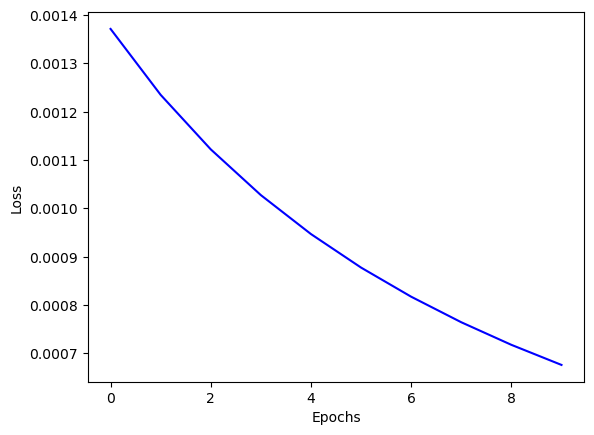

In [19]:
import matplotlib.pyplot as plt
plt.plot( history.history["loss"], "b"  )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

<font face="sans-serif" color=blue size=5ptx style="line-height:25px;">  
<strong>Exemple complet</strong></font><br>

Epoch 1/10
100/100 [==============================] - 1s 4ms/step - loss: 0.3076 - accuracy: 0.9400
Epoch 2/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0138 - accuracy: 1.0000
Epoch 3/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 4/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 5/10
100/100 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 6/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 7/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 8/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 9/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 10/10
100/100 [==============================] - 0s 4ms/step - loss: 0.0015 - accuracy: 1.0000

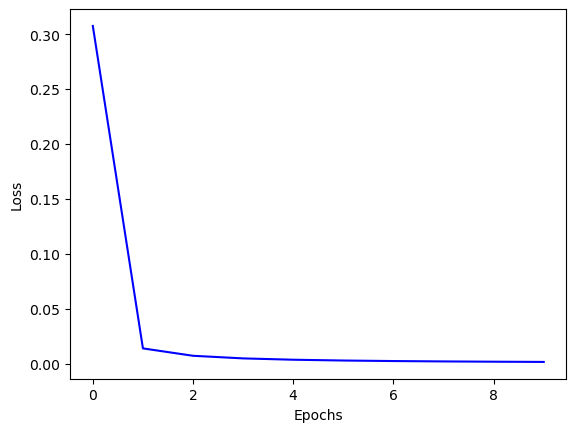

In [20]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# création du réseau séquentiel
model = keras.Sequential()
model.add( keras.layers.Dense(32, input_shape=(16,), activation='relu') )
model.add( keras.layers.Dense(20) )

model.compile(loss      = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                          optimizer = 'SGD',
                          metrics   = 'accuracy')

# entrainement
X = tf.convert_to_tensor(np.ones((2000,16)))
Y = tf.convert_to_tensor(np.ones((2000,1)))

history  = model.fit(X, Y, verbose=1, batch_size=20, epochs=10)

model.fit(X, Y, verbose=1, batch_size=20, epochs=10)

# predict & evaluate
newdata       = np.ones((1,16))
loss, metric  = model.evaluate(newdata)
ypred         = model.predict(newdata)

# graphique
plt.plot( history.history["loss"], "b"  )
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

<font face="sans-serif" color=blue size=5ptx style="line-height:45px;">  
<strong>L’API Functional</strong></font><br>
<font face="sans-serif" color=green size=4ptx style="line-height:45px;">  
    <strong>Présentation</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Nous allons traiter l’API Functional dont l’organisation semblera familière à ceux qui pratiquent déjà un langage de programmation.<br>  
En effet, à travers cette API, le réseau est décrit comme une suite d’opérations, chaque opération nécessitant des tenseurs en entrée pour produire un tenseur résultat. Les tenseurs représentées par des variables permettent de propager l’information à travers le réseau.<br> 
Voici un exemple simple :<br>
</font>    

In [21]:
from tensorflow import keras

inputs   = keras.Input(shape=(3,), name="my_input")
features = keras.layers.Dense(64, activation="relu")(inputs)
outputs  = keras.layers.Dense(10, activation="softmax")(features)
model    = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Le tenseur input est un tenseur symbolique ne représentant pas de données en particulier. L’utilisation de tenseurs symboliques permet de décrire comment les données se propagent lors du traitement.<br><br> La taille du tenseur d’entrée étant partiellement spécifiée, cette caractéristique se propage à travers les différents traitements pour contraindre la taille des tenseurs symboliques suivants.<br><br> Ainsi, apparaissent en sortie des différentes couches des tailles de la forme (None,3), (None,64), (None,10).<br><br>
<strong>Avertissement</strong><br>
<font face="sans-serif" color=black size=3ptx style="line-height:15px;"> 
Les couches de traitement acceptent aussi bien un tenseur de valeurs qu’un tenseur symbolique. Dans les deux cas, elles retournent un tenseur de même type dont les caractéristiques sont compatibles avec le tenseur d’entrée.
</font><br>
<font face="sans-serif" color=green size=4ptx style="line-height:15px;"><br>
<strong>layers.Concatenate ():</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">     
L’API functional permet de gérer plusieurs entrées de types diverses (texte, images) de les traiter et de combiner les résultats obtenus. Pour cela, une couche dédiée layers.Concatenate() permet de fusionner plusieurs tenseurs.   
Elle prend en entrée une liste de tenseurs tous de même taille excepté pour l’axe dans lequel va avoir lieu la concaténation. Ainsi la concaténation sur l’axe 1 de deux tenseurs (1,2,5) et (1,4,5) donne un tenseur de taille (1,6,5).
</font>

In [25]:
x = np.arange(10).reshape(1,2, 5)
x

array([[[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]]])

In [26]:
y = np.arange(10, 30).reshape(1,4,5)
y

array([[[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])

In [27]:
z = tf.keras.layers.Concatenate(axis=1)([x, y])
z

<tf.Tensor: shape=(1, 6, 5), dtype=int64, numpy=
array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29]]])>

<font face="sans-serif" color=green size=4ptx style="line-height:15px;"><br>
<strong>Graph de calcul</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">     
Grâce à l’API Functional, il est possible de traiter plusieurs sources de données en entrée, de concaténer leurs résultats, et d’appliquer plusieurs traitements pour obtenir plusieurs prédictions en parallèle :</font>
<div> 
    <img src="images/kerasgraphcalc.png" style="width:600px;"/>
</div> 
 <font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
Basiquement, cette logique de traitement s’écrit comme une suite de calculs :</font><br><br>

    images      = keras.Input(shape=(...), name="input_images")
    texts       = keras.Input(shape=(...), name="input_text")
    
    L12         = layer2(layer1(images))
    L34         = layer4(layer3(texts))
    
    concat      = layers.Concatenate()([L12,L34])
    L5          = layer5(concat)
    
    Temperature = layers7(layers6(L5)
    Pression    = layer8(L5)    
    
<font face="sans-serif" color=green size=4ptx style="line-height:15px;"><br>
<strong>Gestion des entrées/sorties multiples</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
A chaque étape, il faudra préciser les informations associées aux entrées/sorties multiples dans des listes :<br><br>
model = keras.Model(inputs=[images,texts], outputs=[Temperature,Pression])<br>
model.compile(optimizer=..., loss = [ loss1, loss2 ], metrics = [ metric1, metric2])<br><br>
Les tenseurs de données d’entrée sont transmis à la fonction fit() comme habituellement.<br>
Dans cette configuration, il faudra créer des tenseurs accueillant les résultats en sortie et les données comme arguments à la fonction fit() :</font><br><br>    

        image_data = ...
        text_data  = ...
        OutTemp  = np.empty(...)
        
        OutPress = np.empty(...)
        
        model.fit([image_data, text_data],[OutTemp, OutPress],epochs = 20)

<font face="sans-serif" color=blue size=5ptx style="line-height:45px;">  
<strong>La class Model</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">   
Si vous savez créer une sous-classe en Python, cette 3-ième approche vous semblera tout aussi abordable que les deux précédentes. Dans cette version, la construction d’un réseau se fait en dérivant la classe Model. Il faudra dans votre sous-classe :    
<ul>
  <li>Penser à chaîner le constructeur vers la classe parent</li>
  <li>Instancier les différentes couches dans le constructeur</li>
  <li>Créer une fonction call() pour gérer la passe Forward</li>
  <li>Dispatcher les différents inputs à partir du dictionnaire passé en paramètre</li>
  <li>Retourner l’ensemble des tenseurs de sortie</li>
</ul> 
</font>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">
Voici un schéma simplifié :
</font> 
    
class MonModel(keras.Model):

        def __init__(self,...):
                super().__init__()      # chaînage des constructeurs
                self.layer1 = ...
                self.layer2 = ...
                ..
                self.layer6 = ...
                self.layer7 = ...

        def call(self,inputs):
                # les différents inputs sont transmis à travers un dictionnaire
                text        = inputs[\'input_text\']
                images      = inputs[\'input_images\']

                # passe Forward
                L12         = layer2(layer1(images))
                L34         = layer4(layer3(texts))
                concat      = layers.Concatenate()([L12,L34])
                L5          = layer5(concat)
                Temperature = layers7(layers6(L5)
                Pression    = layer8(L5)

                # retour des différents tenseurs de sortie à travers un tuple
                return Temperature, Pression
   

<font face="sans-serif" color=red size=6ptx style="line-height:45px;">  
<strong>Trucs et astuces</strong></font><br>
<font face="sans-serif" color=green size=4ptx style="line-height:45px;">  
    <strong>Save/load</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
Après avoir entraîné un modèle, il est possible de le sauvegarder entièrement (topologie et paramètres internes) dans un fichier. Il est tout aussi simple de recharger un modèle par la suite, afin par exemple de poursuivre l’entraînement :<br>
<ul>    
    <li>model.save('myfile')</li>
    <li>keras.models.load_model('myfile')</li><br>
</ul> 
<font face="sans-serif" color=green size=4ptx style="line-height:45px;">  
    <strong>Callback</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">  
En informatique, une fonction de callback désigne une fonction passée en paramètre à un système. Le système décidera par la suite d’appeler cette fonction au moment opportun. Les fonctions de callback représentent les bases des interfaces graphiques modernes. Ainsi, lorsque vous cliquez/appuyez sur un bouton de l’interface, c’est l’objet bouton qui va rechercher si une fonction de callback est associée à l’évènement de clic et s’il en trouve une, il l’appellera en conséquence. On peut citer aussi les API3D temps réel qui appellent la fonction de rendu uniquement lorsque le système est prêt à effectuer un nouveau calcul d’image. Si des données doivent persister d’un appel à l’autre de la fonction de callback, alors on utilise un objet de callback qui joue exactement le même rôle.<br><br>
Keras permet d’utiliser un mécanisme de callback associée à la fonction fit() ceci à chaque fin de traitement d’une epoch. Les objectifs peuvent être variés :<br>
<ul>
    <li>Sauvegarder l’état du réseau sur le disque, les coupures électriques, cela peut arriver :)</li>
    <li>Arrêter l’apprentissage si la fonction d’erreur ne diminue plus et passer à une autre expérience.</li>
    <li>Tracer régulièrement le graphique les performances réseau et plus à la fin de l’apprentissage</li>
    <li>Sauvegarder/Afficher des données ou des tracés intermédiaires sur le disque</li>  
</ul>
</font>
<font face="sans-serif" color=green size=4ptx style="line-height:45px;">  
    <strong>Les callback existants</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">      
Keras fournit plusieurs callbacks préprogrammés dans keras.callbacks, notamment le callback ModelCheckpoint permettant de sauvegarder le modèle régulièrement ou lorsqu’il atteint une meilleure précision.<br> 
Voici un exemple :
<ul>
<li>mycallback = keras.callbacks.ModelCheckpoint(filepath='Directory', monitor='val_loss', save_best_only = True)</li>
<li>...</li>
<li>model.fit(..., callbacks = [ mycallback ])</li> 
</ul>
</font>
<font face="sans-serif" color=green size=4ptx style="line-height:45px;">  
    <strong>Ecrire sont propre callback</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">
Si vous voulez effectuer une action spécifique, vous pouvez définir votre propre callback en dérivant la classe keras.callbacks.Callback en utilisant les méthodes suivantes :    
<ul>
<li>on_epoch_begin/on_epoch_end(epoch,logs) : appelé à chaque début/fin d’epoch</li>
<li>on_batch_begin/on_batch_end(batch,logs) : appelé à chaque début/fin de batch</li>
<li>on_train_begin/on_train_start(logs) : appelé au début/à la fin de l’apprentissage</li> 
</ul>
Le paramètre logs correspond à un dictionnaire stockant les valeurs d’erreur. Les paramètres epoch et batch stockent le numéro de l’itération correspondante. Voici un exemple traçant la courbe d’erreur et fur et à mesure que l’apprentissage progresse, version à utiliser dans un script Python :
</font>

      class LossHistory(keras.callbacks.Callback): 
    
         def on_train_begin(self, logs):
                self.data = []
                plt.ion()      # interactive mode
                self.fig = plt.figure()
                self.ax  = self.fig.add_subplot(111)
    
        def on_batch_end(self, batch, logs):
                self.data.append(logs["loss"])
    
        def on_epoch_end(self, epoch, logs):
                self.ax.cla()                   # clear figure
                self.ax.plot(self.data)         # plot
                self.fig.canvas.draw()
                self.fig.canvas.flush_events()  # force update
    
      model.fit(X, Y, batch_size=20, epochs=10, callbacks = [LossHistory()], verbose=1 ) 
    
    
 <font face="sans-serif" color=black size=3ptx style="line-height:25px;">   
 A chaque fin d’epoch, l’affichage de la courbe d’erreur est mis à jour à l’écran  
<div> 
    <img src="images/curve.gif" style="width:400px;"/>
</div>  
Une variante pour jupyter notebook     
</font>   
   
    from IPython.display import clear_output
    class LossHistory(keras.callbacks.Callback):
    
        def on_train_begin(self, logs):
                self.data = []
                self.fig = plt.figure()

        def on_batch_end(self, batch, logs):
                self.data.append(logs["loss"]    )

        def on_epoch_end(self, epoch, logs):
                clear_output(wait=True)
                plt.plot(self.data)
                plt.show()

    # mettez verbose = 0 si l'affichage texte perturbe l'affichage graphique
    model.fit(X, Y, batch_size=20, epochs=10, callbacks = [LossHistory()], verbose= 1) 

<font face="sans-serif" color=green size=4ptx style="line-height:25px;">  
<strong>Tensorboard</strong></font><br>
<font face="sans-serif" color=black size=3ptx style="line-height:25px;"> 
L’affichage dynamique avec matplotlib et la technique de callback nous a permis d’avoir une visualisation graphique basique de la courbe d’erreur. L’affichage dynamique avec matplotlib et la technique de callback nous a permis d’avoir une visualisation graphique basique de la courbe d’erreur.<br>
Si l’on cherche une interface offrant plus d’options (zoom, sélection), Tensorboard permet de visualiser interactivement les différentes informations issues de la phase d’apprentissage. <br>
La technique consiste à sauvegarder régulièrement sur le disque les informations issues des métriques durant l’apprentissage ceci en utilisant le callback fourni par Tensorboard. <br>
En parallèle, vous démarrez un serveur local Tensorboard qui fournit une adresse web locale pour accéder à son frontend. Ce service accède aux données disponibles dans le répertoire de log. Il reste à lancer votre navigateur pour consulter cette page web de monitoring.<br>
En version poste, localisez le répertoire de votre installation Python.<br> 
Dans une fenêtre de commande, démarrez le serveur Tensorboard en tapant :

    python -m tensorboard.main
    Serving TensorBoard on localhost;
    TensorBoard 2.11.0 at http://localhost:6006/

<font face="sans-serif" color=black size=3ptx style="line-height:25px;">
Voici l’interface que vous obtenez dans le navigateur 
<div> 
    <img src="images/tensorboard.png" style="width:600px;"/>
</div>  
Il reste à mettre en place le callback de Tensorboard dans la fonction fit() de Keras :
    
    tensorboard = keras.callbacks.TensorBoard(log_dir="/path_to_log_dir",)
    model.fit(...,callbacks=[tensorboard])
    
Pour que Tensorboard fonctionne, il faut que le répertoire donné à la fonction de callback dans Keras soit le même que celui utilisé par le serveur.
    
Dans un notebook Colab, l’affichage n’est pour l’instant pas dynamique car accessible uniquement une fois l’entraînement terminé. Pour exécuter un service TensorBoard depuis un notebook, utilisez les commandes suivantes : </font>
    
    %load_ext tensorboard
    %tensorboard --logdir /full_path_to_your_log_dir
    
<font face="sans-serif" color=black size=3ptx style="line-height:25px;">    
Il reste à créer un callback dans Colab :
</font>    
    
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
    ...
    model.fit(..., callbacks=[tensorboard_callback])
    

In [33]:
import numpy as np
from tensorflow import keras
from keras import backend as K
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

from keras.models import Model
from keras.models import load_model

import matplotlib.pyplot as plt

In [34]:
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train_data, Y_train_data), (X_test_data, Y_test_data) = mnist.load_data()

In [37]:
N = X_train_data.shape[0]  # 60 000 données
print(N)

60000


In [38]:
X_train = np.reshape(X_train_data, (N,28,28,1))

In [39]:
print(X_train.shape)

(60000, 28, 28, 1)


In [41]:
import numpy as np

arr = np.array([[[1,1,1,1], [1,1,1,1], [1,1,1,1], [1,1,1,1]],
                [[1,1,1,1], [1,1,1,1], [1,1,1,1], [1,1,1,1]],
                [[1,1,1,1], [1,1,1,1], [1,1,1,1], [1,1,1,1]]])
M = arr.shape
print(M)

(3, 4, 4)


In [44]:
arr_t = np.reshape(arr, (arr.shape[0],4,4,1))
print(arr_t.shape)
#print(arr_t)

(3, 4, 4, 1)


In [45]:
X_test_data.shape[0]

10000

In [47]:
X_test = np.reshape(X_test_data, (X_test_data.shape[0],28,28,1))
X_test.shape

(10000, 28, 28, 1)

In [54]:
X_train = X_train/255

In [55]:
X_train.shape

(60000, 28, 28, 1)

In [56]:
Y_train = to_categorical(Y_train_data, num_classes=10)

In [57]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [66]:
from IPython.display import clear_output
class LossHistory(keras.callbacks.Callback):

    def on_train_begin(self, logs):
            self.data = []
            self.fig = plt.figure()

    def on_batch_end(self, batch, logs):
            self.data.append(logs["loss"]    )

    def on_epoch_end(self, epoch, logs):
            clear_output(wait=True)
            plt.plot(self.data)
            plt.show()

# mettez verbose = 0 si l'affichage texte perturbe l'affichage graphique
#model.fit(X, Y, batch_size=20, epochs=10, callbacks = [LossHistory()], verbose= 1) 

In [88]:
import os
import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard 

%load_ext tensorboard 
%tensorboard --logdir /tmp/tensorboard


tensorboard = keras.callbacks.TensorBoard(log_dir="/tmp/tensorboard",)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

#model.fit(...,callbacks=[tensorboard])

cifar = tf.keras.datasets.cifar100
(x_train, y_train), (x_test, y_test) = cifar.load_data()
model = tf.keras.applications.ResNet50(
    include_top=True,
    weights=None,
    input_shape=(32, 32, 3),
    classes=100,)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model.compile(optimizer="adam", loss=loss_fn, metrics=["accuracy"])
#model.fit(x_train, y_train, epochs=5, batch_size=64)
#model.fit(x_train, y_train, batch_size=64, epochs=5, callbacks = [LossHistory()], verbose= 1) 
model.fit(x_train, y_train, batch_size=64, epochs=5, callbacks = [tensorboard], verbose= 1) 

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Epoch 1/5
782/782 [==============================] - 63s 71ms/step - loss: 4.7157 - accuracy: 0.0774
Epoch 2/5
782/782 [==============================] - 48s 62ms/step - loss: 4.0960 - accuracy: 0.1409
Epoch 3/5
782/782 [==============================] - 48s 62ms/step - loss: 4.1982 - accuracy: 0.1088
Epoch 4/5
782/782 [==============================] - 48s 61ms/step - loss: 3.7479 - accuracy: 0.1659
Epoch 5/5
782/782 [==============================] - 47s 60ms/step - loss: 3.8864 - accuracy: 0.1669
